1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

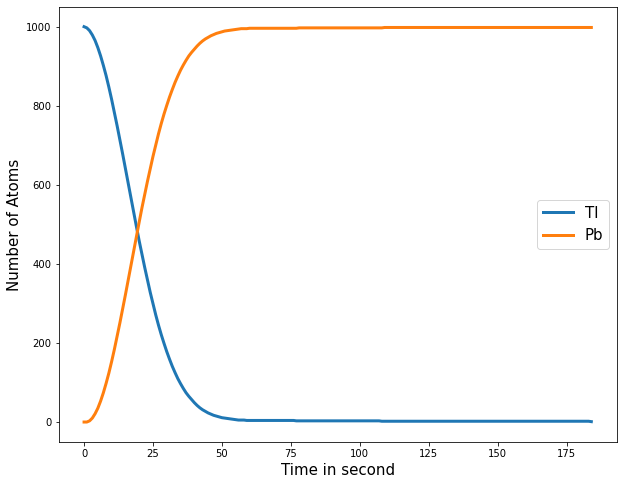

In [2]:
import numpy as np
import numpy.random as rand
from scipy import stats
import matplotlib.pyplot as plt
rand.seed(123)

def p_decay(t):
    tau = 3.052 #minutes
    return 1- 2**(-t/tau)

N_Tl_i =1000
N_Tl_t = [N_Tl_i]
N_Pb_t = [0]
t = 1/60
i = 0

while True:
    if(N_Tl_t[i] == 1):
        break;
    else:
        N_Tl_t.append(N_Tl_t[i]- int(p_decay(t)*N_Tl_t[i]))
        N_Pb_t.append(N_Tl_i - N_Tl_t[i])
        i += 1
        t += 1/60

N_Tl_t = np.array(N_Tl_t)
N_Pb_t = np.array(N_Pb_t)
t = np.arange(len(N_Pb_t))

fig = plt.figure(figsize=(10,8))

plt.plot(t, N_Tl_t, label = "Tl", lw =3)
plt.plot(t, N_Pb_t, label = "Pb", lw =3)
plt.ylabel("Number of Atoms", fontsize=15)
plt.xlabel("Time in second", fontsize=15)
plt.legend(fontsize=15)
        

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [6]:
#1. Plot the function and compute the integral of  𝑓(𝑥)  between 0 and 2 with the hit/miss method. Evaluate the error of your estimate 
#(hint: repeat the integral  𝑁  times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)

import math

def f(x):
    return (math.sin(1/(1-x)))**2

N = 1000
count = 0 

for i in range (N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x) : count +=1

res = 2*count/N
error = 0,6745*math.sqrt(res*(2-res)/N)
print("Result of The Integral =", res, "Error =", error)


Result of The Integral = 1.394 Error = (0, 196.0422385586841)


In [7]:
#2.Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.
import math
def f(x) :
    return (math.sin(1/(1-x)))**2

def integral(starting, ending, N):
    width = (float(ending)-float(starting))/N
    Sum = 0
    for i in range (N):
        height = f(starting+i*width)
        area = height*width
        Sum+=area
    return Sum
res = integral(0.0001, 2, 10000)
error = 0,6745*math.sqrt(res*(2-res)/N)
print("Result of The Integral =", res, "Error =", error)

Result of The Integral = 1.3472037141098345 Error = (0, 200.02644992516434)


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [10]:
import numpy as np
import numpy.random as rnd
N_points= 1000
x_un = rnd.rand(N_points)
y_un = rnd.rand(N_points)

circle_area = 4*np.sum((x_un**2 + y_un**2) <=1)/N_points
print("Area of The Circle (R=1)=", circle_area)
n_sphere_points =rnd.rand(N_points,10)
vol = 4*np.sum(np.where(np.sum(n_sphere_points**2, axis=1) <=1))/N_points
print("Volume of the 10D sphere=",vol)


Area of The Circle (R=1)= 3.104
Volume of the 10D sphere= 7.996


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [12]:
def f(x):
    return 1/(2*np.sqrt(x))

def icdf(y):
    return np.power(y,2)

def f_over_w(x):
    return 1/(np.exp(x) + 1)

N_points =100000

y_unif =rnd.rand(N_points)
x_i_sampling = icdf(y_unif)

I = 2*np.mean(f_over_w(x_i_sampling))
I


0.8385046476044598